# Australian Open 2019
BetFair released a data set as part of a datathon competiton to predict the outcome of each game in the 2019 Australian Open.

This is my attempt at performing exploratory analysis on the data provided in additon to publicly available data to increase the feature size of the data set.

## Import Packages
Import the required packages for reading, exploratory analsysis and visualisation.

In [103]:
import glob
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates
%matplotlib inline
import seaborn as sns 
from datetime import datetime
from datetime import timedelta

sns.set()
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [104]:
WTA = pd.read_csv('WTA_matches.csv',na_values = ['.'])
matchOdds = pd.read_csv('aus_open_women_match_odds.csv',na_values = ['.'])
tournamentOdds = pd.read_csv('aus_open_women_tournament_odds.csv',na_values = ['.'])

## Preliminary Look at the data
Take a peak at the data to get a sense of what it contains.

In [105]:
WTA.head()

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Johanna Larsson,Lourdes Dominguez-Lino,Auckland,1-Jan-14,Hard,First Round,84.0,69.0,0.0,2.0,...,4.0,16.0,32.0,13.0,33.0,2.0,8.0,24.0,62.0,53.0
1,Ana Konjuh,Roberta Vinci,Auckland,1-Jan-14,Hard,First Round,259.0,14.0,0.0,2.0,...,1.0,34.0,65.0,10.0,23.0,5.0,6.0,30.0,68.0,74.0
2,Ayumi Morita,Lucie Safarova,Auckland,1-Jan-14,Hard,First Round,60.0,29.0,0.0,2.0,...,3.0,21.0,32.0,12.0,32.0,3.0,5.0,26.0,68.0,59.0
3,Venus Williams,Andrea Hlavackova,Auckland,1-Jan-14,Hard,First Round,47.0,134.0,0.0,2.0,...,4.0,23.0,34.0,12.0,28.0,2.0,6.0,30.0,82.0,65.0
4,Julia Goerges,Karin Knapp,Auckland,1-Jan-14,Hard,First Round,72.0,41.0,0.0,2.0,...,4.0,52.0,70.0,30.0,58.0,2.0,2.0,28.0,102.0,110.0


In [106]:
matchOdds.head()

,tournament,men_women,match_date,player_1,player_1_odds,player_2,player_2_odds
0,Australian Open 2012,Women,2012-01-16,Anastasia Rodionova,8.20,Caroline Wozniacki,1.12
1,Australian Open 2012,Women,2012-01-16,Anna Tatishvili,1.35,Ashleigh Barty,3.70
2,Australian Open 2012,Women,2012-01-16,Alize Cornet,3.05,Monica Niculescu,1.47
3,Australian Open 2012,Women,2012-01-16,Alla Kudryavtseva,1.82,Pauline Parmentier,2.20
4,Australian Open 2012,Women,2012-01-16,Christina McHale,2.74,Lucie Safarova,1.41


In [107]:
tournamentOdds.head()

,tournament,men_women,player,odds
0,Australian Open 2012,Women,Petra Kvitova,3.95
1,Australian Open 2012,Women,Serena Williams,5.70
2,Australian Open 2012,Women,Victoria Azarenka,8.20
3,Australian Open 2012,Women,Kim Clijsters,12.00
4,Australian Open 2012,Women,Na Li,14.00


* The WTA matches data contains information on a portion of all matches in the womens international tennis tournaments, since 2014. The winner, loser and date of each match is identified a long with some selected match statistics.
* The Match odds file contains the odds for all Australian Open matches since 2012. 
* The Tournament odds file contains the odds for each player winning the Australian Open since 2012, this differs from the match odds by providing odds for the player becoming the Australian Open Champion for that year. 

The odds file's only contain the odds for the Australian Open tournements, which wont likely provide a significant improvement on our potential predictions.

## Join Additional data

It is always a good idea to see if there is any additional information available, this can be from a multitude of sources, such as personal data sets, data sets available on the web or potentially domain knowledge.

I am aware of a few sources of additional data sets for professional tennis, in my opinion, [tennis-data] is a great source for additional data. This contains results from both the ATP and WTA tours from back to January 2000. This resource includes additional features such as game-by-game scores, additional betting odds, and player ranking points. There is also a project, [The Match Charting Project], that aims to use the crowd to create a data set that includes the shot-by-shot record. Currently there is almost 5000 matches available in the database and will continue to benefit from the contribution of interested fans. The data from this project has not been included here.

I will join this data set with the provided data, to have more features available for the model.

The data is available in seperate files for each year.


[tennis-data]:(http://www.tennis-data.co.uk/index.php)
[The Match Charting Project]:(http://www.tennisabstract.com/charting/meta.html)

In [108]:
# Load the data from each year.
# The files are all labeled in the form '20XX.xlsx'
allFiles = glob.glob("WTA/20*.xlsx")

list_ = []
for file in allFiles:
    list_.append(pd.read_excel(file))

data_All = pd.concat(list_, axis=0, ignore_index=True)
    

# I will drop some odds ratings that aggregate the existing odds available.
data_All.drop(['MaxW','MaxL','AvgW','AvgL'],axis=1)



,B365L,B365W,Best of,Comment,Court,Date,EXL,EXW,L1,L2,...,Tier,Tournament,W1,W2,W3,WPts,WRank,WTA,Winner,Wsets
0,1.50,2.50,3,Completed,Outdoor,2012-12-30,1.50,2.50,4.0,1.0,...,International,ASB Classic,6.0,6.0,NaN,950.0,65.0,1,Parmentier P.,2.0
1,2.37,1.53,3,Completed,Outdoor,2012-12-31,2.25,1.60,5.0,3.0,...,International,ASB Classic,7.0,6.0,NaN,902.0,68.0,1,Vesnina E.,2.0
2,1.83,1.83,3,Completed,Outdoor,2012-12-31,1.90,1.85,6.0,6.0,...,International,ASB Classic,1.0,7.0,6.0,683.0,100.0,1,Daniilidou E.,2.0
3,1.50,2.50,3,Completed,Outdoor,2012-12-31,1.45,2.60,7.0,2.0,...,International,ASB Classic,6.0,6.0,7.0,956.0,63.0,1,Bertens K.,2.0
4,2.75,1.40,3,Completed,Outdoor,2012-12-31,2.80,1.40,1.0,7.0,...,International,ASB Classic,6.0,6.0,7.0,1096.0,54.0,1,Flipkens K.,2.0
5,2.25,1.57,3,Completed,Outdoor,2012-12-31,2.15,1.65,6.0,3.0,...,International,ASB Classic,4.0,6.0,6.0,860.0,73.0,1,Larsson J.,2.0
6,3.00,1.36,3,Completed,Outdoor,2012-12-31,2.80,1.40,6.0,3.0,...,International,ASB Classic,4.0,6.0,6.0,1220.0,47.0,1,Halep S.,2.0
7,2.37,1.53,3,Completed,Outdoor,2012-12-31,2.25,1.60,6.0,2.0,...,International,ASB Classic,7.0,6.0,NaN,1680.0,23.0,1,Wickmayer Y.,2.0
8,1.83,1.83,3,Completed,Outdoor,2012-12-31,1.75,2.00,5.0,1.0,...,International,ASB Classic,7.0,6.0,NaN,884.0,70.0,1,Hampton J.,2.0
9,2.20,1.61,3,Retired,Outdoor,2012-12-31,2.15,1.65,3.0,NaN,...,International,ASB Classic,6.0,NaN,NaN,1161.0,49.0,1,Watson H.,1.0


## Data Inconsistencies
While attempting to join the two data sets, I have found a number of inconsistencies that need to be dealt with.
1. The tournament names are in different formats.
2. Some tournament locations are different formats.
3. There are some player names that appear to be typos.
4. There is some inconsitencies in the player name format

I will be joining the new data set to the WTA data, so I will try to create a standard format for the tournament location and the player names.

In [109]:
# Strip the tournament locaton.
WTA['Location'] = WTA['Tournament'].str.split(',').apply(lambda x: x[-1].strip())

# Make the location formats consistent.
WTA['Location'] = WTA['Location'].str.replace('-',' ')
WTA['Location'][WTA['Tournament'] == 'Paris'] = 'State Pierre de Coubertin'
WTA['Location'][WTA['Tournament'] == 'Pattaya City'] = 'Pattaya'


WTA['Tournament'] = WTA['Tournament'].str.replace('-',' ')
WTA['Tournament'] = WTA['Tournament'].str.split(',').apply(lambda x: x[0].strip())

# Strip the leading and train spaces from the location
data_All['Location'] = data_All['Location'].str.strip().apply(lambda x: x)
# Strip any hypens in the location names
data_All['Location'] = data_All['Location'].str.replace('-',' ')
data_All['Location'][data_All['Location'] == '\'s Hertogenbosch'] = 's Hertogenbosch'

data_All['Location'][data_All['Location'] == 'Nürnberg'] = 'Nurnberg'

data_All['Location'][(data_All['Location'] == 'Paris') & 
                     (data_All['Tournament'] == 'Open GDF Suez')] = 'State Pierre de Coubertin'

# Replace all the hyphens in the names.
WTA['Winner'] = WTA['Winner'].str.replace('-',' ')
WTA['Loser'] = WTA['Loser'].str.replace('-',' ')

# Force all player names to lower case for comparison
WTA['Winner'] = WTA['Winner'].str.lower()
WTA['Loser']= WTA['Loser'].str.lower()



### Inconsistent Player Names
The new data set contains a lot of inconsitencies in player names, all of which I had to identify individually and create a correction for each player.

It is conceivable that I did not catch all the differences, but I am confident that I caught most.


In [110]:
# WTA Names
WTA['Winner'][WTA['Winner'] == 'su wei hsieh'] =  'hsieh s.w.'
WTA['Loser'][WTA['Loser'] == 'su wei hsieh'] =  'hsieh s.w.'

WTA['Winner'][WTA['Winner'] == 'patricia mayr achleitner'] = 'mayr p.'
WTA['Loser'][WTA['Loser'] == 'patricia mayr achleitner'] = 'mayr p.'

WTA['Winner'][WTA['Winner'] == 'irina camelia begu'] = 'begu i.'
WTA['Loser'][WTA['Loser'] == 'irina camelia begu'] = 'begu i.'

WTA['Winner'][WTA['Winner'] == 'ying ying duan'] = 'duan y.y.'
WTA['Loser'][WTA['Loser'] == 'ying ying duan'] = 'duan y.y.'

WTA['Winner'][WTA['Winner'] == 'lara arruabarrena'] = 'arruabarrena vecino l.'
WTA['Loser'][WTA['Loser'] == 'lara arruabarrena'] = 'arruabarrena vecino l.'

WTA['Winner'][WTA['Winner'] == 'kimiko date'] = 'date krumm k.'
WTA['Loser'][WTA['Loser'] == 'kimiko date'] = 'date krumm k.'

WTA['Winner'][WTA['Winner'] == 'haochen tang'] = 'tang h.c.'
WTA['Loser'][WTA['Loser'] == 'haochen tang'] = 'tang h.c.'

WTA['Winner'][WTA['Winner'] == 'anna lena friedsam'] = 'friedsam a.l.'
WTA['Loser'][WTA['Loser'] == 'anna lena friedsam'] = 'friedsam a.l.'

WTA['Winner'][WTA['Winner'] == 'paula cristina goncalves'] = 'goncalves p.c.'
WTA['Loser'][WTA['Loser'] == 'paula cristina goncalves'] = 'goncalves p.c.'

WTA['Winner'][WTA['Winner'] == 'ana sofia sanchez'] = 'sanchez a.s.'
WTA['Loser'][WTA['Loser'] == 'ana sofia sanchez'] = 'sanchez a.s.'

WTA['Winner'][WTA['Winner'] == 'tornado alicia black'] = 'black t.a.'
WTA['Loser'][WTA['Loser'] == 'tornado alicia black'] = 'black t.a.'

WTA['Winner'][WTA['Winner'] == 'michelle larcher de brito'] = 'larcherde brito m.'
WTA['Loser'][WTA['Loser'] == 'michelle larcher de brito'] = 'larcherde brito m.'

WTA['Winner'][WTA['Winner'] == 'an sophie mestach'] = 'mestach a.s.'
WTA['Loser'][WTA['Loser'] == 'an sophie mestach'] = 'mestach a.s.'

WTA['Winner'][WTA['Winner'] == 'maria joao koehler'] = 'koehler m.j.'
WTA['Loser'][WTA['Loser'] == 'maria joao koehler'] = 'koehler m.j.'

        
# For some reason the Betfair data contains names of players that dont exist. 
# I had to identify the specific games using the WTA, website and match the 
# opponenets with the real names.
WTA['Winner'][WTA['Winner'] == 'jarmila wolfe'] =  'gajdosova j.'
WTA['Loser'][WTA['Loser'] == 'jarmila wolfe'] =  'gajdosova j.'

WTA['Winner'][WTA['Winner'] == 'iveta benesova'] = 'melzer i.'
WTA['Loser'][WTA['Loser'] == 'iveta benesova'] = 'melzer i.'


In [111]:

# Correct some inconsistencies and known typos with the players 
data_All['Winner'] = data_All['Winner'].str.replace('-',' ')
data_All['Loser'] = data_All['Loser'].str.replace('-',' ')

data_All['Winner'][data_All['Winner'] == 'Zakopalova K.'] = 'koukalova k.'
data_All['Loser'][data_All['Loser'] == 'Zakopalova K.'] = 'koukalova k.'

data_All['Winner'][data_All['Winner'] == 'Lucic-Baroni M.'] = 'lucic m.'
data_All['Loser'][data_All['Loser'] == 'Lucic-Baroni M.'] = 'lucic m.'

data_All['Winner'][data_All['Winner'] == 'Zahlavova Strycova B.'] = 'strycova b.'
data_All['Loser'][data_All['Loser'] == 'Zahlavova Strycova B.'] = 'strycova b.'

# There are two different Pliskova's with the same initials, K. These players 
# are seperatly identified in the new data set, but I am unable to match them 
# to the supplied data. So, because we are joining the data on four features 
# (Winner, loser, Year, and location), it will be ok, to make all K. Pliskova's 
# the same abbreviation. 
# The differences will be identifiable by the other joining features, loser, 
# year and location.
data_All['Winner'][data_All['Winner'] == 'Pliskova Ka.'] = 'pliskova k.'
data_All['Loser'][data_All['Loser'] == 'Pliskova Ka.'] = 'pliskova k.'

data_All['Winner'][data_All['Winner'] == 'Pliskova Kr.'] = 'pliskova k.'
data_All['Loser'][data_All['Loser'] == 'Pliskova Kr.'] = 'pliskova k.'


# Force all player names to lower case for comparison
data_All['Winner'] = data_All['Winner'].str.lower()
data_All['Loser'] = data_All['Loser'].str.lower()


In [112]:
# Convert all names to a loose common format
# Surname I1. I2. 
# I1 - First initial,
# I2 - second initial
def convertNames(df,column, newColumn):
    # WTA names
    '''
    Convert the player names into a common format.
    '''

    # Broadcast a defalt value to create the new column
    df[newColumn] = 'none'
    
    # Cycle through each player
    for player in df[column]:

        # Split the full name in to the seperate names
        names = player.split(' ')

        # Create the format based on the length of the names.
        if len(names) == 2:

            newName = names[1]+' '+names[0][0]+'.'
            
        elif len(names) == 3:
            newName = names[1]+' '+names[2]+' '+names[0][0]+'.'

        else:
            newName = names[2]+' '+names[3]+' '+names[0][0]+'.'+names[1][0]+'.'
        
                
        # Apply the newly formated names
        df[newColumn][df[column] == player] = newName

    return df


In [113]:
# Convert all the winners and losers to the standard format. 
WTA = convertNames(WTA,'Winner', 'Winner_merge')
WTA = convertNames(WTA,'Loser', 'Loser_merge')


In [114]:
# Create a feature in each data set for the year of the tournament. 
# This is required when joining the two data sets.
WTA['Tournament_Year'] = pd.to_datetime(WTA['Tournament_Date']).dt.year
data_All['Year'] = data_All['Date'].dt.year


In [115]:
# Join the two data sets together.
joined_Data = pd.merge(WTA,data_All, how='left', 
                       left_on=['Location','Tournament_Year','Winner_merge','Loser_merge'], 
                       right_on=['Location','Year','Winner','Loser'])

# Have a quick look for a sanity check
joined_Data.head()


,Winner_x,Loser_x,Tournament_x,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Tournament_y,W1,W2,W3,WPts,WRank,WTA,Winner_y,Wsets,Year
0,johanna larsson,lourdes dominguez lino,Auckland,1-Jan-14,Hard,First Round,84.0,69.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ana konjuh,roberta vinci,Auckland,1-Jan-14,Hard,First Round,259.0,14.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ayumi morita,lucie safarova,Auckland,1-Jan-14,Hard,First Round,60.0,29.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,venus williams,andrea hlavackova,Auckland,1-Jan-14,Hard,First Round,47.0,134.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,julia goerges,karin knapp,Auckland,1-Jan-14,Hard,First Round,72.0,41.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#joined_Data.to_csv('WTA_joined_Data.csv',index=False)

# Missing data

Now we need to check if there is any missing data in the data sets.

In [117]:
joined_Data.isnull().sum()

Winner_x                         0
Loser_x                          0
Tournament_x                     0
Tournament_Date                  0
Court_Surface                    0
Round_Description               62
Winner_Rank                     53
Loser_Rank                     160
Retirement_Ind                   1
Winner_Sets_Won                  4
Winner_Games_Won                 0
Winner_Aces                   1601
Winner_DoubleFaults           1567
Winner_FirstServes_Won        1559
Winner_FirstServes_In         1559
Winner_SecondServes_Won       1559
Winner_SecondServes_In        1559
Winner_BreakPoints_Won        1559
Winner_BreakPoints            1559
Winner_ReturnPoints_Won       1665
Winner_ReturnPoints_Faced     1665
Winner_TotalPoints_Won        1559
Loser_Sets_Won                   4
Loser_Games_Won                  0
Loser_Aces                    1602
Loser_DoubleFaults            1567
Loser_FirstServes_Won         1559
Loser_FirstServes_In          1559
Loser_SecondServes_W

# Check for valid values

The joined data has a number of features with missing data which we will address individually.

Some of the features in the ATP data will have analagous features in the additional tennis data. We will be able to use these features to replace some of the NaN values, others we can impute values.

In [118]:
# Convert the date string to a datetime object
#joined_Data['Tournament_Date'] = pd.to_datetime(joined_Data['Tournament_Date'], dayfirst = True, infer_datetime_format=True)

In [119]:
# Round_Description

# While the round descriptions are likely to be different rounds, the simplest way to deal 
# with this feature is to assume the most frequent value.
joined_Data['Round_Description'][joined_Data['Round_Description'].isnull() == True] = joined_Data['Round_Description'].mode()[0]
# - I could potentially determine the round description from the date and tournament, 
# but there aren't that many null values, so this likely wont have a significant impact.


In [120]:
# Retirement_Ind

# There is only 1 missing value for the Retirement index, so we will assume that the game was completed.
joined_Data['Retirement_Ind'][joined_Data['Retirement_Ind'].isnull() == True] = 0


In [121]:
# _Sets_Won

# Close examination of these null values indicates that the winner and loser games won are 
# equal and small (always less than 7). Additionaly, it seems that all of these games 
# were won due to retirement. Therefore we will indicate that all sets won will be zero,
# Because we dont wont to inflate a players ability by giving them 2 - 3 sets when we dont 
# know if they could have actually beaten their opponent.
joined_Data['Winner_Sets_Won'][joined_Data['Winner_Sets_Won'].isnull() == True] = 0
joined_Data['Loser_Sets_Won'][joined_Data['Loser_Sets_Won'].isnull() == True] = 0


Because we have two joined data sets with similar features, we can use the second data set to set some of the missing values. The tennis-data data set contains the ranks for the winners and losers that can be used to replace some of the missing values. For the remaining missing values we can try to impute a value.



In [122]:
# _Rank

# I will check if there is any valid value from the new data set for the missing ranks.
# For the remaining missing values we can assume the player is not ranked yet, 
# so I'll give them one.
winnerIdx = list(joined_Data[joined_Data['Winner_Rank'].isnull() == True].index)

for index in winnerIdx:
    
    if np.isnan(joined_Data['Winner_Rank'].iloc[index]) and not np.isnan(joined_Data['WRank'].iloc[index]):
        joined_Data['Winner_Rank'].iloc[index] = joined_Data['WRank'].iloc[index]

loserIdx = list(joined_Data[joined_Data['Winner_Rank'].isnull() == True].index)

for index in loserIdx:
    
    if np.isnan(joined_Data['Loser_Rank'].iloc[index]) and not np.isnan(joined_Data['LRank'].iloc[index]):
        joined_Data['Loser_Rank'].iloc[index] = joined_Data['LRank'].iloc[index]

        
# Assign a rank to the remaining missing values
joined_Data['Winner_Rank'][joined_Data['Winner_Rank'].isnull() == True] = joined_Data['Winner_Rank'].max()
joined_Data['Loser_Rank'][joined_Data['Loser_Rank'].isnull() == True] = joined_Data['Loser_Rank'].max()


In [123]:
# _Aces

# The new data set does not have aces count, so we can't 
# use this to replace some missing values in our data.

# Most games dont have many aces at all, so I will assume that neither 
# of the players in these games score an ace.
joined_Data['Winner_Aces'][joined_Data['Winner_Aces'].isnull() == True] = 0
joined_Data['Loser_Aces'][joined_Data['Loser_Aces'].isnull() == True] = 0


In [124]:
# _DoubleFaults

# The new data set does not have double fault count, so we cant
# use this to replace some missing values in our data.

# Imputing double faults is more difficult, but after trying a few options like, 
# minimum, maximum, average, and mode. I will assume the real value is closer 
# to the most frequent value.
joined_Data['Winner_DoubleFaults'][joined_Data['Winner_DoubleFaults'].isnull() == True] = joined_Data['Winner_DoubleFaults'].mode()[0]
joined_Data['Loser_DoubleFaults'][joined_Data['Loser_DoubleFaults'].isnull() == True] = joined_Data['Loser_DoubleFaults'].mode()[0]


In [125]:
# _FirstServes_Won

# There's no easy way to determine what the number of first serves won is from the 
# existing data, so we will assume the most frequent value.
joined_Data['Winner_FirstServes_Won'][joined_Data['Winner_FirstServes_Won'].isnull() == True] = joined_Data['Winner_FirstServes_Won'].mode()[0]
joined_Data['Loser_FirstServes_Won'][joined_Data['Loser_FirstServes_Won'].isnull() == True] = joined_Data['Loser_FirstServes_Won'].mode()[0]

# _FirstServes_In

# Much like the first serves won, there is no easy way to determine the number of first 
# serves in, when looking at the existing data. So we will assume the most frequent value.
joined_Data['Winner_FirstServes_In'][joined_Data['Winner_FirstServes_In'].isnull() == True] = joined_Data['Winner_FirstServes_In'].mode()[0]
joined_Data['Loser_FirstServes_In'][joined_Data['Loser_FirstServes_In'].isnull() == True] = joined_Data['Loser_FirstServes_In'].mode()[0]


In [126]:
# _SecondServes_Won

# Similar to the first serves won/in, there is no easy way to determine the number of second 
# serves won, when looking at the existing data. So we will assume the most frequent value.
joined_Data['Winner_SecondServes_Won'][joined_Data['Winner_SecondServes_Won'].isnull() == True] = joined_Data['Winner_SecondServes_Won'].mode()[0]
joined_Data['Loser_SecondServes_Won'][joined_Data['Loser_SecondServes_Won'].isnull() == True] = joined_Data['Loser_SecondServes_Won'].mode()[0]

# _SecondServes_In

# Again, similar to the last few featuers, there is no easy way to determine the number of second 
# serves in, when looking at the existing data. So we will assume the most frequent value.
joined_Data['Winner_SecondServes_In'][joined_Data['Winner_SecondServes_In'].isnull() == True] = joined_Data['Winner_SecondServes_In'].mode()[0]
joined_Data['Loser_SecondServes_In'][joined_Data['Loser_SecondServes_In'].isnull() == True] = joined_Data['Loser_SecondServes_In'].mode()[0]


In [127]:
# _BreakPoints

# Break points are similar to aces, in the fact that they don't occur often in matches, so 
# I will assume no break points were seen.
joined_Data['Winner_BreakPoints'][joined_Data['Winner_BreakPoints'].isnull() == True] = 0
joined_Data['Loser_BreakPoints'][joined_Data['Loser_BreakPoints'].isnull() == True] = 0

# _BreakPoints_Won

# I have made the ascertion that break points don't occur too often, so if they don't 
# occur, they can't be won
joined_Data['Winner_BreakPoints_Won'][joined_Data['Winner_BreakPoints_Won'].isnull() == True] = 0
joined_Data['Loser_BreakPoints_Won'][joined_Data['Loser_BreakPoints_Won'].isnull() == True] = 0




In [128]:
# _ReturnPoints_Won

# The number of return points won varies significantly between matches, so there is no 
# simple value to use here. I will assume the most frequent value.
joined_Data['Winner_ReturnPoints_Won'][joined_Data['Winner_ReturnPoints_Won'].isnull() == True] = joined_Data['Winner_ReturnPoints_Won'].mode()[0]
joined_Data['Loser_ReturnPoints_Won'][joined_Data['Loser_ReturnPoints_Won'].isnull() == True] = joined_Data['Loser_ReturnPoints_Won'].mode()[0]
# - It may be possible to make a reasonable estimate based on the number of games played and 
# sets won, but I will leave this until later enhancements.


In [129]:
# _ReturnPoints_Faced

# We can make a reasonable minimum estimate of the points faced based on the number of opponents serves in.
loserPtsFaced = joined_Data['Winner_FirstServes_In'][joined_Data['Loser_ReturnPoints_Faced'].isnull() == True] + joined_Data['Winner_SecondServes_In'][joined_Data['Loser_ReturnPoints_Faced'].isnull() == True]
joined_Data['Loser_ReturnPoints_Faced'][joined_Data['Loser_ReturnPoints_Faced'].isnull() == True] = loserPtsFaced

winnerPtsFaced = joined_Data['Loser_FirstServes_In'][joined_Data['Winner_ReturnPoints_Faced'].isnull() == True] + joined_Data['Loser_SecondServes_In'][joined_Data['Winner_ReturnPoints_Faced'].isnull() == True]
joined_Data['Winner_ReturnPoints_Faced'][joined_Data['Winner_ReturnPoints_Faced'].isnull() == True] = winnerPtsFaced



In [130]:
# _TotalPoints_Won

# We can make a reasonable estimate of the total points won by totaling some of the 
# existing features, FirstServes_Won, SecondServes_Won, BreakPoints_Won, and ReturnPoints_Won.
winnerPtsWon = joined_Data['Winner_FirstServes_Won'][joined_Data['Winner_TotalPoints_Won'].isnull() == True] + joined_Data['Winner_SecondServes_Won'][joined_Data['Winner_TotalPoints_Won'].isnull() == True] + joined_Data['Winner_BreakPoints_Won'][joined_Data['Winner_TotalPoints_Won'].isnull() == True] + joined_Data['Winner_ReturnPoints_Won'][joined_Data['Winner_TotalPoints_Won'].isnull() == True]
joined_Data['Winner_TotalPoints_Won'][joined_Data['Winner_TotalPoints_Won'].isnull() == True] = winnerPtsWon

loserPtsWon = joined_Data['Loser_FirstServes_Won'][joined_Data['Loser_TotalPoints_Won'].isnull() == True] + joined_Data['Loser_SecondServes_Won'][joined_Data['Loser_TotalPoints_Won'].isnull() == True] + joined_Data['Loser_BreakPoints_Won'][joined_Data['Loser_TotalPoints_Won'].isnull() == True] + joined_Data['Loser_ReturnPoints_Won'][joined_Data['Loser_TotalPoints_Won'].isnull() == True]
joined_Data['Loser_TotalPoints_Won'][joined_Data['Loser_TotalPoints_Won'].isnull() == True] = loserPtsWon


In [131]:
# NEW FEATURE

# The number of ranking points the player has, going into the tournament.

# There is no way to estimate the player points going into each 
# tournament, so I will set the missing values to zero.
joined_Data['WPts'][joined_Data['WPts'].isnull() == True] = 0
joined_Data['LPts'][joined_Data['LPts'].isnull() == True] = 0


In [132]:
# NEW FEATURE

# The scores for each set of the match for each player.

# We can assume the games won in each set, by setting the winner to 6 and the 
# loser to the average value for games won in each set by the losing player.
# - All womens matches are best of 3 sets so we will assume the result was 
# 2 sets to 0.
joined_Data['W1'][joined_Data['W1'].isnull() == True] = 6
joined_Data['L1'][joined_Data['L1'].isnull() == True] = int(joined_Data['L1'].mean())
joined_Data['W2'][joined_Data['W2'].isnull() == True] = 6
joined_Data['L2'][joined_Data['L2'].isnull() == True] = int(joined_Data['L2'].mean())
joined_Data['W3'][joined_Data['W3'].isnull() == True] = 0
joined_Data['L3'][joined_Data['L3'].isnull() == True] = 0


In [133]:
# NEW FEATURE

# The match score for each player.

# Having a look at the data, shows that when the winner sets and loser sets 
# are empty, the game was not completed and is categorised as a walkover.
joined_Data['Wsets'][joined_Data['Wsets'].isnull() == True] = 0
joined_Data['Lsets'][joined_Data['Lsets'].isnull() == True] = 0


In [134]:
# NEW FEATURE

# Where the available betting agency odds are empty, I will assume equal likelyhood 
# of each player winning.
joined_Data['B365W'][joined_Data['B365W'].isnull() == True] = 1
joined_Data['B365L'][joined_Data['B365L'].isnull() == True] = 1
joined_Data['EXW'][joined_Data['EXW'].isnull() == True] = 1
joined_Data['EXL'][joined_Data['EXL'].isnull() == True] = 1
joined_Data['LBW'][joined_Data['LBW'].isnull() == True] = 1
joined_Data['LBL'][joined_Data['LBL'].isnull() == True] = 1
joined_Data['PSW'][joined_Data['PSW'].isnull() == True] = 1
joined_Data['PSL'][joined_Data['PSL'].isnull() == True] = 1
joined_Data['SJW'][joined_Data['SJW'].isnull() == True] = 1
joined_Data['SJL'][joined_Data['SJL'].isnull() == True] = 1


In [135]:
# NEW FEATURE

# Court Type

# Having a look at the data, indicates that there are very few instances 
# where the court type is not defined. Considering most tournaments are 
# outdoor, we will assume the missing values are outdoor tournaments
joined_Data['Court'][joined_Data['Court'].isnull() == True] = 'Outdoor'

# - Possibly could try to find a valid value for the tournament (transform by tournament)

In [136]:
# Surface

# I will check if there is any valid value from the new feature set to 
# provide a value for the missing ones. For the remaining missing values 
# we can assume the most common value, which is likely to be 'Hard', 
# but I'll leave it up to the data to decide.
surfaceIdx = list(joined_Data[joined_Data['Surface'].isnull() == True].index)

for index in surfaceIdx:
    
    if math.isnan(joined_Data['Surface'].iloc[index]) and not joined_Data['Court_Surface'].iloc[index]:
        joined_Data['Surface'].iloc[index] = joined_Data['Court_Surface'].iloc[index]

joined_Data['Surface'][joined_Data['Surface'].isnull() == True] = joined_Data['Surface'].mode()[0]


In [137]:
# Tier

# It's unclear what the tournament tier labeled 'SEC' actually is. With inspection of
# the data, the other features indicate that it is actually a Tour Championship.
joined_Data['Tier'][joined_Data['Tier'] == 'SEC'] = 'Tour Championships'

# The 'Elite Trophy' and the 'Tour Championship' tournements are both part of the end 
# of year championship, So we will combine these two tournament tiers into one, the 
# 'Tour Championship'
joined_Data['Tier'][joined_Data['Tier'] == 'Elite Trophy'] = 'Tour Championships'


# There are a number of missing values for the Tier feature. We can use a proxy of the 
# number of games played in the tournament. We need to count the number of games in each 
# tournament and apply the value to each tournament.
joined_Data['Tier_Games'] = joined_Data.groupby('Tournament_x')['Tournament_x'].transform('count')

# Now we can calculate the 90th percentile for the existing values in each Tier and 
# use this as the threshold to determine which Tier the tournement should be.
qunatiles = joined_Data.groupby('Tier')['Tier_Games'].quantile(.9)


joined_Data['Tier'][(joined_Data['Tier'].isnull() == True) & 
                      (joined_Data['Tier_Games'] <= qunatiles['Tour Championships'])] = 'Tour Championships'
joined_Data['Tier'][(joined_Data['Tier'].isnull() == True) & 
                      (joined_Data['Tier_Games'] <= qunatiles['International'])] = 'International'
joined_Data['Tier'][(joined_Data['Tier'].isnull() == True) & 
                      (joined_Data['Tier_Games'] <= qunatiles['Premier'])] = 'Premier'
joined_Data['Tier'][(joined_Data['Tier'].isnull() == True) & 
                      (joined_Data['Tier_Games'] > qunatiles['Premier'])] = 'Grand Slam'


In [138]:
# Best of

# This is the maximum number of sets player per match for the tournament.
# The mens Grand Slam tournaments are the only tournements that have a 
# best of 5 set count, so we we can set all the womens 'Best of' feature to 3
joined_Data['Best of'][joined_Data['Best of'].isnull() == True] = 3



In [139]:
# Date

# This is the date the match was played. Many of these matches are 
# qualifying matches so are not included additional tennis data we added 
# in. So we can assume the tournament data for the missing values
joined_Data['Date'][joined_Data['Date'].isnull() == True] = pd.to_datetime(joined_Data['Tournament_Date'][joined_Data['Date'].isnull() == True],dayfirst =True)
joined_Data['Year'][joined_Data['Year'].isnull() == True] = joined_Data['Date'].dt.year



In [140]:
# Comment

# This feature describes how the game was completed, with possible values 
# of retired, walkover or disqualified. We will make the assumption that 
# all matches were completed, because its a rare occurance that a match 
# is not completed.
joined_Data['Comment'][joined_Data['Comment'].isnull() == True] = 'Completed'

## Remove the Duplicate Features
After dealing with all the missing values I will remove the duplicate features from joining the two data sets. I will also rename some features for clarity.

In [141]:
joined_Data.drop(['WTA','AvgL','AvgW','Court_Surface', 'Loser_merge','Loser_y','LRank',
                  'Round','Tournament_y','Winner_merge','Winner_y','WRank',
                  'Tournament_Year','Year','MaxW','MaxL','SJW','SJL'], 
                  axis=1, inplace=True)

joined_Data.rename(columns={'Loser_x': 'Loser', 'LPts': 'Loser_RankPts',
                            'Lsets': 'Loser_Sets', 'Tournament_x': 'Tournament',
                            'Winner_x': 'Winner', 'WPts': 'Winner_RankPts',
                            'Wsets': 'Winner_Sets'}, inplace=True)


In [142]:
joined_Data.isnull().sum()

Winner                       0
Loser                        0
Tournament                   0
Tournament_Date              0
Round_Description            0
Winner_Rank                  0
Loser_Rank                   0
Retirement_Ind               0
Winner_Sets_Won              0
Winner_Games_Won             0
Winner_Aces                  0
Winner_DoubleFaults          0
Winner_FirstServes_Won       0
Winner_FirstServes_In        0
Winner_SecondServes_Won      0
Winner_SecondServes_In       0
Winner_BreakPoints_Won       0
Winner_BreakPoints           0
Winner_ReturnPoints_Won      0
Winner_ReturnPoints_Faced    0
Winner_TotalPoints_Won       0
Loser_Sets_Won               0
Loser_Games_Won              0
Loser_Aces                   0
Loser_DoubleFaults           0
Loser_FirstServes_Won        0
Loser_FirstServes_In         0
Loser_SecondServes_Won       0
Loser_SecondServes_In        0
Loser_BreakPoints_Won        0
Loser_BreakPoints            0
Loser_ReturnPoints_Won       0
Loser_Re

In [143]:
#joined_Data.to_csv('joined_Data.csv',index=False)

# EDA

Now that I have dealt with all the missing data, I can start to explore the data.

## Series Tournaments

The newly added data set gives us an indication of the distribution of matches played in each WTA Series. The tournaments will offer a different amount of world ranking points and prize money. In addition there are limited positions available for each tournament, where each player needs to announce their intention to play each specific tournament. 


 - There are 31 [International] tournaments per year, all knock-out tournaments offering 280 ranking points to the winner.
 - There are 21 [Premier Tournaments] per year, which consists of four Premier Mandatory, five Premier 5, and twelve Premier events offering a different amount of ranking points. This system differs from that used for the men's ATP rankings, but only slightly. The men have nine Masters events with 1,000 points for the winner (akin to WTA Premier Mandatory and Premier 5 tournaments), and the next two tiers of ATP tournaments offer 500 and 250 points for winning respectively. 
 - There is 1 [Tour Championship] tournement at the end of each season, featuring 12 players from the top 20 players.
 - There are 4 [Grand Slam] tournaments per year with 128 players per tournament. The Grand Slams offer the most ranking points, prize money, public and media attention.
 
 [Tour Championship]:(https://en.wikipedia.org/wiki/WTA_Elite_Trophy)
 [International]:(https://en.wikipedia.org/wiki/WTA_International_tournaments)
 [Premier Tournaments]:(https://en.wikipedia.org/wiki/WTA_Premier_tournaments)
 [Grand Slam]:(https://en.wikipedia.org/wiki/Grand_Slam_(tennis))


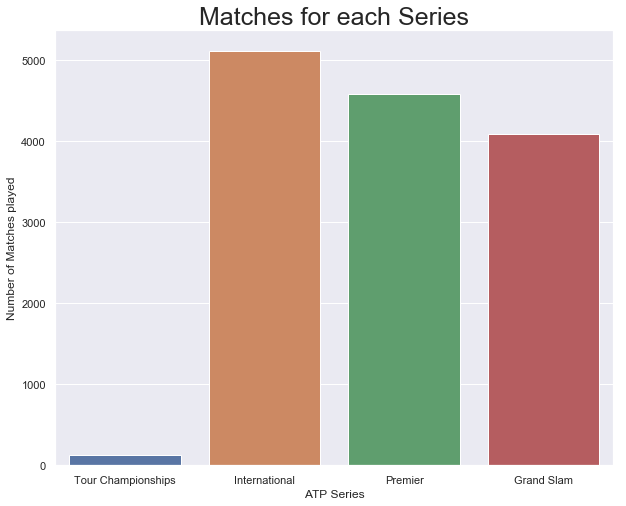

In [144]:
plt.figure(figsize=(10,8))
sns.countplot(joined_Data['Tier'], order = ['Tour Championships', 'International','Premier','Grand Slam'])
plt.title('Matches for each Series',fontsize=25)
plt.xlabel('ATP Series')
plt.ylabel('Number of Matches played')
plt.show()

There are very few Tour Championship games, with the ramining split relatively evenly across the International, Premier and Grand Slam events.

The Tour Championship tournement is the season ending championship of the WTA tour, consisting of the 12 of the top 20 singles players. 

### What porportion of the Data is Australian Open  Matches
Since we are concerned with predicting the results of the Australian Open, lets see how much of our data is represented by previous Australian open tournaments.

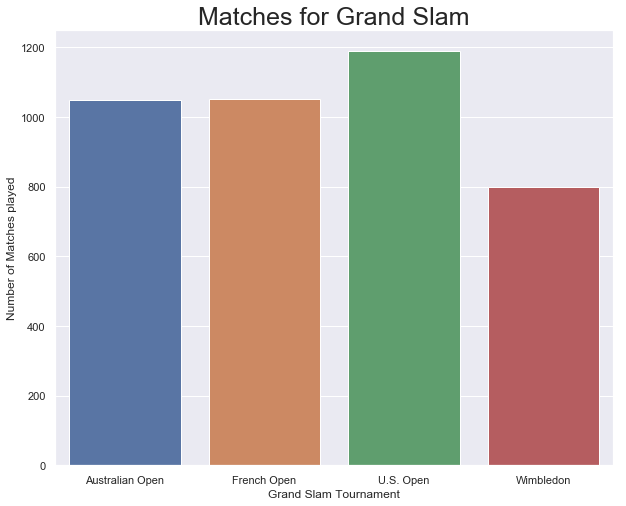

In [145]:
GrandSlams = joined_Data[joined_Data['Tier'] == 'Grand Slam']

plt.figure(figsize=(10,8))
sns.countplot(GrandSlams['Tournament'], order = ['Australian Open','French Open','U.S. Open','Wimbledon'])
plt.title('Matches for Grand Slam',fontsize=25)
plt.xlabel('Grand Slam Tournament')
plt.ylabel('Number of Matches played')
plt.show()


In [146]:
total = GrandSlams.groupby('Tournament')['Tournament'].count().sum()

round(GrandSlams.groupby('Tournament')['Tournament'].count()/total*100,2)



Tournament
Australian Open    25.67
French Open        25.71
U.S. Open          29.06
Wimbledon          19.56
Name: Tournament, dtype: float64

In [147]:
total = joined_Data.groupby('Tournament')['Tournament'].count().sum()
tournament_Count = joined_Data.groupby('Tournament')['Tournament'].count()/total*100

print ('{0:0.3}%'.format(tournament_Count['Australian Open']))

7.55%


It seems that all the Grand Slams are evenly represented, and about 7.5% of the data represents the previous Australian Open tournaments 

## Surface
We can have a look at the number of matches played on each surface.

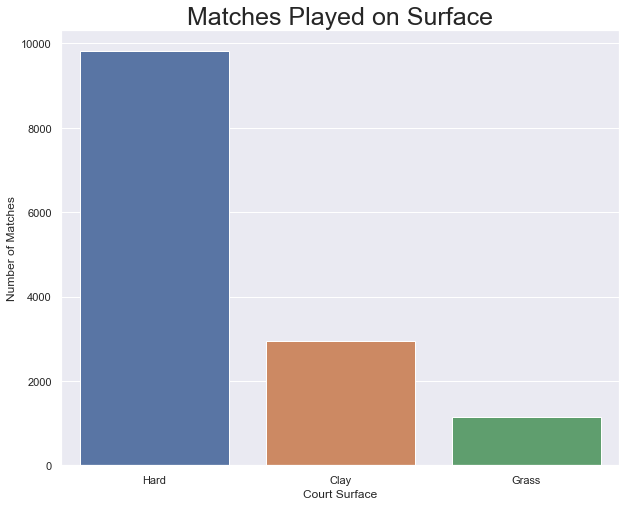

In [148]:
# distribution of surface
plt.figure(figsize=(10,8))
sns.countplot(joined_Data['Surface'].astype('str'))
plt.title('Matches Played on Surface',fontsize=25)
plt.xlabel('Court Surface')
plt.ylabel('Number of Matches')
plt.show()

Most Matches are played on Hard court and Clay.

## Matches per Round

Now lets look at the number of matches player per round. 

You would expect that most matches are played in the early rounds as all players have to go through each round until they've won all the matches they play in the tournament to win.

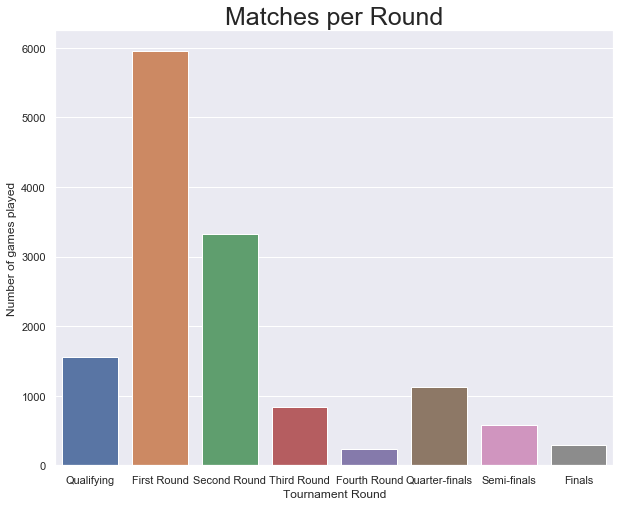

In [149]:
# distribution of round
plt.figure(figsize=(10,8))
sns.countplot(joined_Data['Round_Description'], 
              order=['Qualifying','First Round','Second Round','Third Round','Fourth Round',
                     'Quarter-finals','Semi-finals','Finals'])
plt.title('Matches per Round',fontsize=25)
plt.xlabel('Tournament Round')
plt.ylabel('Number of games played')
plt.show()

Our assumption is some what true for the first four rounds.

However, you may notice that the first round, the "Qualifying" round, there is fewer matches than the first round. This is because, not all players have to qualify for each tournament. In most cases, the top players will gain automatic entry to a tournament, where as the lower ranked players need to fight for their chance to play in each tournament. 

Also, in some of the major tournaments, some of the lower ranked players may be awarded a wild card entry, which is usually decided by the national federation/association holding the tournament.

## Matches played
We can have a look at the number of matches won and matches played, but first we have to determine the value for each player at each tournament.

In [150]:
# Count the number of times the player has won
joined_Data = joined_Data.sort_values(by=['Date'], ascending = False)

joined_Data['Winner_Matches_Won'] = 0
joined_Data['Winner_Matches_Played'] = 0

playerWinCount = {}
playerMatchCount = {}

for idx in range(len(joined_Data)):
    
    key = joined_Data.iloc[idx]['Winner']
    
    # Count the number of matches won
    if key in playerWinCount.keys():
        playerWinCount[key] += 1
    else:
        playerWinCount[key] = 1
    
    joined_Data['Winner_Matches_Won'].iloc[idx] = playerWinCount.get(key)
    
    # Count the number of mathces played as time progresses.
    if key in playerMatchCount.keys():
        playerMatchCount[key] += 1
    else:
        playerMatchCount[key] = 1
    
    LoserKey =  joined_Data.iloc[idx]['Loser']

    if LoserKey in playerMatchCount.keys():
        playerMatchCount[LoserKey] += 1
    else:
        playerMatchCount[LoserKey] = 1

    joined_Data['Winner_Matches_Played'].iloc[idx] = playerMatchCount.get(key)

In [151]:
# We can use these additional features together to calculate the match percentage for 
# each player and see how that corresponds to the rank.
joined_Data['Winner_Match_Percentage'] =  joined_Data['Winner_Matches_Won']/joined_Data['Winner_Matches_Played']

We Shouldn't use the progressive match percentage, because this will be over inflated for the early matches. We can use the latest match percentage for all matches seen as a measure of a players win performance.

In [152]:
# Select the max number of games for each player
allPlayers = pd.unique(joined_Data[['Winner']].values.ravel('K'))

joined_Data['Winner_Career_Match_Percentage'] = 0

for player in allPlayers:
    
    # Get the last Match Percentage - This is the most recent career match percentage.
    value = joined_Data[joined_Data['Winner'] == player].iloc[-1]['Winner_Match_Percentage']
    
    # Assign the value to career match percentage for all player entries.
    joined_Data['Winner_Career_Match_Percentage'][joined_Data['Winner'] == player] = value

In [153]:
# Drop the features that are over inflated, the progressive win percentage
joined_Data.drop(['Winner_Match_Percentage'] ,axis=1, inplace=True)

In [154]:

def Get_Loser_Feature(data, feature):
    '''
    Apply the feature to the losing player. This relies on the 
    loser players winning at least one match in the data set.
    '''
    
    # Set the feature labels
    newFeature = 'Loser_'+feature
    winFeature = 'Winner_'+feature

    data[newFeature] = 0

    # Get a list of all the losing players
    players = list(set(data['Loser']))

    for player in players:

        # Find where the player is a winner
        value = data[winFeature][data['Winner'] == player]

        if value.empty:
            # The player never won a match
            value = pd.Series([0])

        # Apply this value to all rows where the player is the loser
        data[newFeature][data['Loser'] == player] = value.iloc[0]


    return data



In [155]:
joined_Data = Get_Loser_Feature(joined_Data, 'Matches_Won')
joined_Data = Get_Loser_Feature(joined_Data, 'Matches_Played')
#joined_Data = Get_Loser_Feature(joined_Data, 'Match_Percentage')
joined_Data = Get_Loser_Feature(joined_Data, 'Career_Match_Percentage')



In [156]:
joined_Data.head()

,Winner,Loser,Tournament,Tournament_Date,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,Winner_Games_Won,...,W3,Winner_RankPts,Winner_Sets,Tier_Games,Winner_Matches_Won,Winner_Matches_Played,Winner_Career_Match_Percentage,Loser_Matches_Won,Loser_Matches_Played,Loser_Career_Match_Percentage
13903,ashleigh barty,qiang wang,Zhuhai,29-Oct-18,Finals,19.0,22.0,0.0,2.0,12,...,0.0,2420.0,2.0,39,1,1,0.669565,1,2,0.537415
13902,qiang wang,garbine muguruza,Zhuhai,29-Oct-18,Semi-finals,22.0,17.0,0.0,2.0,12,...,0.0,2155.0,2.0,39,1,2,0.537415,1,2,0.654545
13901,ashleigh barty,julia goerges,Zhuhai,29-Oct-18,Semi-finals,19.0,14.0,0.0,2.0,16,...,6.0,2420.0,2.0,39,2,2,0.669565,1,2,0.580247
13900,caroline garcia,aryna sabalenka,Zhuhai,29-Oct-18,First Round,18.0,12.0,0.0,2.0,12,...,0.0,2600.0,2.0,39,1,1,0.602888,1,2,0.662791
13895,qiang wang,madison keys,Zhuhai,29-Oct-18,First Round,22.0,16.0,0.0,2.0,13,...,6.0,2155.0,2.0,39,2,3,0.537415,1,2,0.665158


(0, 750)

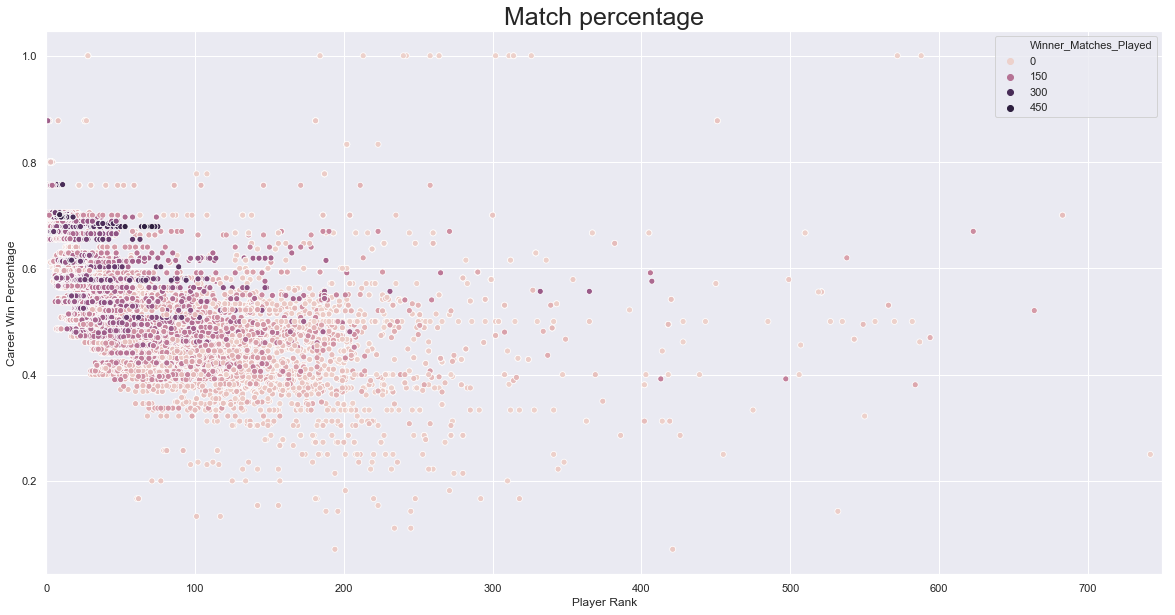

In [157]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x='Winner_Rank', y='Winner_Career_Match_Percentage', hue='Winner_Matches_Played', ax=ax, data=joined_Data)
plt.title('Match percentage',fontsize=25)
plt.xlabel('Player Rank')
plt.ylabel('Career Win Percentage')
plt.legend(loc='upper right')
plt.xlim(0,750)

We can see that the higher ranked players have played more matches and have a higher win percentage. This would indicate that the more experience a player gets, the better chance they have of achieving a higher rank.

## Rank Progression
We can try to see how the rank for each player progresses through their careers. 

We wont be able to visualise all the players in the data set, so we will just look at the players that reached the top 3 at some point in their careers.

In [158]:
# Find the best rank each player reached
joined_Data = joined_Data.sort_values(by='Winner_Rank',ascending=True)
joined_Data['Best_Rank'] = joined_Data.groupby('Winner')['Winner_Rank'].transform('min')

# Select the players that reached the top 3
players = list(set(joined_Data[joined_Data['Best_Rank'] <= 3]['Winner']))

# Create a dataframe with only the top players
topPlayers = pd.DataFrame()
for player in players:
    
    topPlayers = topPlayers.append(joined_Data[joined_Data['Winner'] == player])
    
    

Text(0,0.5,'Player rank')

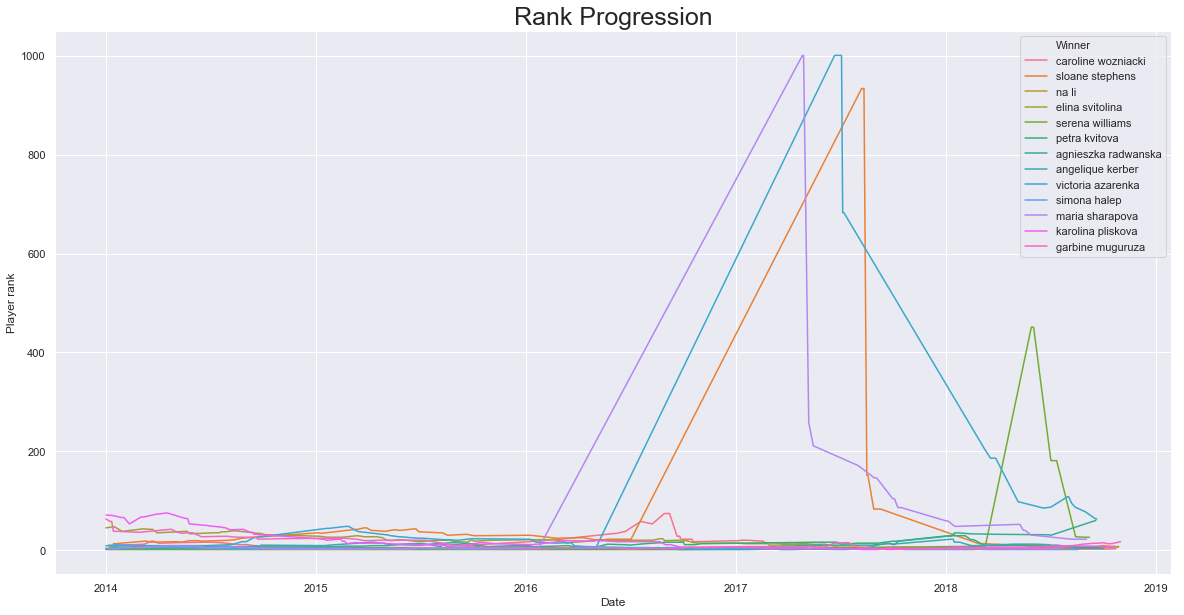

In [159]:
# Plot the rank progression of all the top players.
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="Date", y="Winner_Rank", hue="Winner",ax=ax, data=topPlayers)
plt.title('Rank Progression',fontsize=25)
plt.xlabel('Date')
plt.ylabel('Player rank')

We can see most players approach the higher ranks as they progress through their career, but there are a couple of players that stick out.


* [Maria Sharapova] announced she failed a drug test at the 2016 Australian Open in March, 2016. The International Tennis Federation suspended her from playing tennis for two years, which was reduced to 15 months, from the date of the offence. She returned to the WTA tour on April 26, 2017 at the Porsche Tennis Grand Prix. 
* [Sloan Stephens] had a successful year in 2016, which was cut short by a foot injury that kept her sidelined for eleven months. Returnng from injury in 2017, she won her first Grand Slam singles title at the US Open in just her fifth tournament back. 
* [Victoria Azarenka] and her former boyfriend become involved in a legal child custody case for their son soon after the 2017 Wimbeldon tournament. This resulted in Azarenka's withdrawal from the 2017 US Open and all other 2017 tournaments. Azarenka returned to the tour in April 2018, where she has been able to regain her form and progress through the ranks reach a singles ranking of 51 by the end of 2018.
* [Serena Williams] revealed that she was 20 weeks pregnant in mid April, suggesting that she would have been eight to nine weeks pregnant when she won the Austrlain Open in 2017. After returning to tennis after the pregnancy, Serena had difficulty regaining her previous form and suffered from a pectoral muscle, withdrawing from teh third round at teh French Open.

[Maria Sharapova]:(https://en.wikipedia.org/wiki/Maria_Sharapova)
[Sloan Stephens]:(https://en.wikipedia.org/wiki/Sloane_Stephens)
[Victoria Azarenka]:(https://en.wikipedia.org/wiki/Victoria_Azarenka)
[Serena Williams]:(https://en.wikipedia.org/wiki/Serena_Williams)

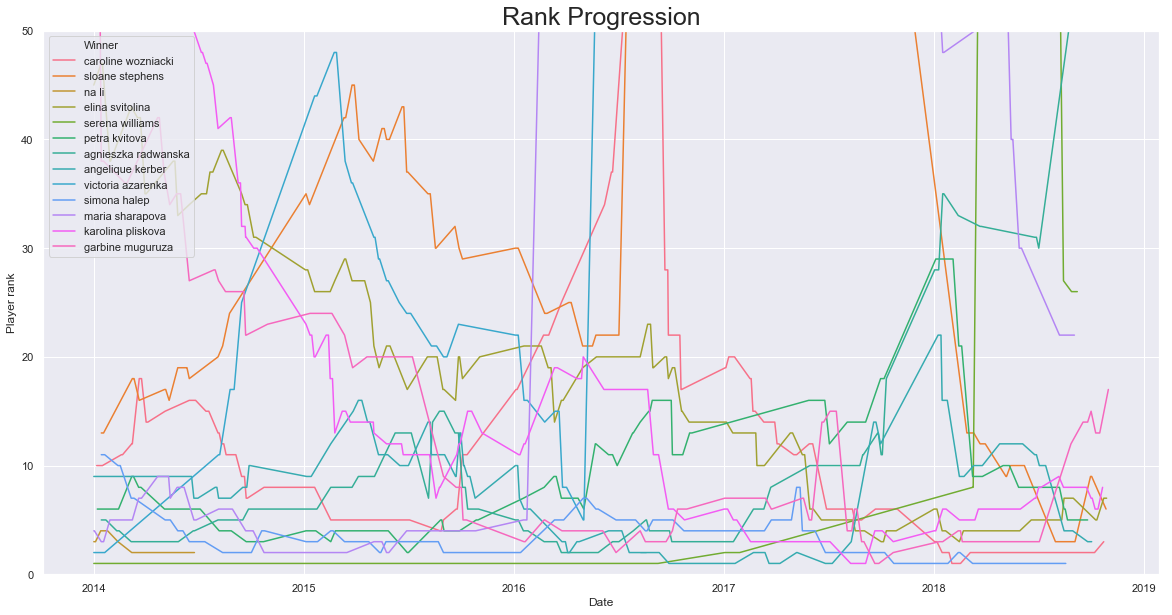

In [160]:
# Rescale the above figure to see more detail at the "higher" ranks
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="Date", y="Winner_Rank", hue="Winner",ax=ax, data=topPlayers)
plt.title('Rank Progression',fontsize=25)
plt.xlabel('Date')
plt.ylabel('Player rank')
plt.ylim(0, 50)
plt.legend(loc='upper left')
#sns.plt.xlim(0, None)

If we zoom in on the "Higher" ranks we can see that some players make significant improvements, while others maintain a steadily high ranking. 

## Feature Engineering

We've already created a few extra features, looking at the number of games played and the progression of games won compared to the games played.

Now, we'll do some research and use our domain kowledge of sport, and Tennis in particular to generate some additional features that may be useful. 

1. **Rank Difference**
A player with a much higher rank is likely to have a better chance in winning over a lower ranked player.
2. **Elo Ranking**
This is analagous to the [Elo ranking] from Chess, where a player gains and looses points based on the outcome of the game. The number of points gained or lost in each match will depend on the opponents elo ranking. Some work has been done to develop a [tennis specific Elo ranking] formula to better represent the game of tennis, with some [blogs] comparing all the open era players on an even footing.

 The reasoning for the elo ranking is the same as the rankings, a higher ranked palyer is likely to defeat a lower ranked player. The elo ranking is generally considered a better estimate of a players ability at any given time, because it takes into account the abiolity of the opponent at the time.

3. **Elo Ranking Difference**
The difference in Elo ranking is analoagous to the difference in ranking.
4. **Career Features**
We can make the assumption that a player with better career statistics is more likely to defeat a player with lessor career statics. We will simply total some of the features for each player, incuding both the times they win the match and lose.
5. **Serving Strength** 
We can define the serving strength of a player by the number of games they win on serve compared to the number of games they serve for. This can also be specified againts a specific player as discussed in this [research]. We may attempt to apply this reseach to our feature engineering.
6. **Recieving Strength**
We can define the receiving strength of a player by the numebr of games they win on return compared to the number of games they play on return. This is analgous to the serving strength, and ca be specified to each opponent
7. **Career Ace rate**
We can hypothesis that a better player will serve more aces per first serves in than a lessor player. We can normalise the number of aces served in a match to provide an equal comparison between these players.
8. **Career Double Faults rate**
Similar to the Aces, we can hypothesis that a better player will serve less double faults. We will normalise the number of double faults in a match , in order to provide an equal comparison of double faults for each player.
9. **Career Return Pts Won rate**
The return points won indicates that a player is heading towards breaking the opponents serve and closer to winning a set. We will use the proportion of return points won to the total return points faced, which could be a proxy measure of the return strength.
10. **Recent Performance**
The recent hisotory of a player indicates how well they are playing in a more recent period of time. This is aimed to capture the improving players as they defeat higher and higher ranks as they progress through recent tournaments.

 The recent history of a player may play a role in their chance of winning a match. This should be over a longer period than a single tournament. We can use the proportion of games won to the total games played over different periods to determine this. We will use a 3 month period to span over potentially several tournaments and to gaurantee at least 10 samples.
11. **Recent Performance on Hard Court**
This is analagous to the recent history feature above, just specific to the Australian Open court surface, hard court. The recent history of a player on Hard court may provide some additional benefit to predicting the winner of a match at the Australian Open. The period used is the same preiod used in the above feature.
12. **Career Performance Hard Court**
We have already created the career features that determines the players career match percentage, we can expand this out to include only the hard court surface.

    ---
 #### More Complex Features
 
13. **Game Win Probability** 
If we assume that any point in a game is a Bernoulli random variable, we can calculate the win probability of a certain player winning a match using the formula derived by [O'Malley]. This is analagous to our target variable.
14. **Common Opponent**
The [common opponent] approach aims to eliminate the potential bias of the serving strength and recieveing strength.

We will refer to [additional research] for more features.

[Elo ranking]:(https://en.wikipedia.org/wiki/Elo_rating_system)
[tennis specific Elo ranking]:(https://www.stat.berkeley.edu/~aldous/157/Old_Projects/huang.pdf)
[blogs]:(https://fivethirtyeight.com/features/djokovic-and-federer-are-vying-to-be-the-greatest-of-all-time/)
[research]:(https://project-archive.inf.ed.ac.uk/msc/20172425/msc_proj.pdf)
[common opponent]:(https://www.sciencedirect.com/science/article/pii/S0898122112002106#br000050)
[additional research]:[https://www.doc.ic.ac.uk/teaching/distinguished-projects/2015/m.sipko.pdf)
[O'Malley]:(https://www.degruyter.com/view/j/jqas.2008.4.2/jqas.2008.4.2.1100/jqas.2008.4.2.1100.xml?format=INT&intcmp=trendmd)



### Rank Difference

In [161]:
joined_Data['Rank_Difference'] = joined_Data['Loser_Rank'] - joined_Data['Winner_Rank'] 

### Elo Ranking
There is a lot of sources available on the web that already perform the elo ranking calcualtions, so I wont "re-invent the wheel", I'll just modify existing code to support our data set.

Here the code to calculate the Elo ranking is taking from [Eduard Thomas'] GitHub page.

[Eduard Thomas']:(https://github.com/edouardthom/ATPBetting)

In [162]:

def computeEloRanking(data, k=32):
    '''
    Source code: https://github.com/edouardthom/ATPBetting
    
    Given the list on matches in chronological order, for each match, compute
    the elo ranking of the 2 players at the beginning of the match
    
    '''
    
    players = list(pd.Series(list(data.Winner)+list(data.Loser)).value_counts().index)
    elo = pd.Series(np.ones(len(players))*1500, index = players)
    elo_ranking=[(1500,1500)]

    for i in range(1,len(data)):
        
        winner = data.iloc[i-1,:].Winner
        loser = data.iloc[i-1,:].Loser
        
        winner_elo = elo[winner]
        loser_elo = elo[loser]
        
        # Calcualte the probability of winning
        winProbability = 1 / (1 + 10 ** ((loser_elo - winner_elo) / 400))    
        
        # Calcualte the new elo ranking
        new_winner_elo = winner_elo + k * (1 - winProbability)
        new_loser_elo = loser_elo - k * (1 - winProbability)
        
        # Re-assign the new elo ranking to the players
        elo[winner] = new_winner_elo
        elo[loser] = new_loser_elo
        
        # Add the new rankings to the list
        elo_ranking.append((elo[data.iloc[i,:].Winner],elo[data.iloc[i,:].Loser])) 
        
        
    # Form a data frame of the elo rankings
    elo_ranking = pd.DataFrame(elo_ranking, columns = ["elo_winner","elo_loser"])
    # Calcualte the probability of winning
    elo_ranking["win_probability"] = 1 / (1 + 10 ** ((elo_ranking["elo_loser"] - elo_ranking["elo_winner"]) / 400))   
    return elo_ranking



In [163]:
# The data set must be chronologically sorted before accurate elo rankings can be calcualted.
joined_Data.sort_values(by=['Date','Tournament','Winner','Loser'], inplace=True)
    
elo = computeEloRanking(joined_Data, 64)


In [164]:
# We need to add the new features to the data set.
joined_Data['Winner_Elo'] = elo['elo_winner']
joined_Data['Loser_Elo'] = elo['elo_loser']
joined_Data['Winner_Probability'] = elo['win_probability']


### Elo Rank Difference

In [165]:
joined_Data['Elo_Difference'] = joined_Data['Loser_Elo'] - joined_Data['Winner_Elo']


### Career Features

We will accumulate the match features for each winner and use the totals as a proxy for the career feature. We can then use these careeer features to determine a number of career statisitcs.

We will use the following features, accumulating when the player is both the winner and loser of the match:

* Sets_Won
* Games_Won
* Aces
* DoubleFaults
* FirstServes_Won
* FirstServes_In
* SecondServes_Won
* SecondServes_In
* BreakPoints_Won
* BreakPoints
* ReturnPoints_Won
* ReturnPoints_Faced

In [166]:
def Winner_Career_Feature(data,feature):
    '''
    Accumulate the total feature that corresponds to the winners name. This 
    includes both when the player won the match and lost the match.
    
    The value of the career feature coresponds to the winners name, with the 
    value mapped to the winners name through out the data set. 
    '''
    
    # Count the numebr of times the player has won
    data = data.sort_values(by=['Date'], ascending = False)

    # Set the new feature name
    new_feature = 'Winner_Career_'+feature
    data[new_feature] = 0
    
    winFeature = 'Winner_'+feature
    lossFeature = 'Loser_'+feature

    winMatches = {}
    loseMatches = {}


    for idx in range(len(data)):

        key = data.iloc[idx]['Winner']

        # Add the feature value when the player winner the match
        if key in winMatches.keys():
            winMatches[key] += data[winFeature].iloc[idx]
        else:
            winMatches[key] = data[winFeature].iloc[idx]

       
        LoserKey = data.iloc[idx]['Loser']

        # Add the feature value when the player lost the match
        if LoserKey in loseMatches.keys():
            loseMatches[LoserKey] += data[lossFeature].iloc[idx]
        else:
            loseMatches[LoserKey] = data[lossFeature].iloc[idx]

    # Populate the total value for each player, when they are the winner
    for idx in range(len(data)):
        key = data.iloc[idx]['Winner']
        
        if winMatches.get(key) == None:
            winMatches[key] = 0
        if loseMatches.get(key) == None:
            loseMatches[key] = 0
        
        data[new_feature].iloc[idx] = (winMatches.get(key) + loseMatches.get(key))
        
    return data

In [167]:

def Loser_Career_Feature(data, feature):
    '''
    Apply the career feature to the losing player. This relies on the 
    loser players winning at least one match in the data set.
    '''
    
    # Set the feature labels
    newFeature = 'Loser_Career_'+feature
    winFeature = 'Winner_Career_'+feature

    data[newFeature] = 0

    # Get a list of all the losing players
    players = list(set(data['Loser']))

    for player in players:

        # Find where the player is a winner
        value = data[winFeature][data['Winner'] == player]

        if value.empty:
            # The player never won a match
            value = pd.Series([0])

        # Apply this value to all rows where the player is the loser
        data[newFeature][data['Loser'] == player] = value.iloc[0]


    return data



In [168]:
# Accumulate the number of sets won
joined_Data = Winner_Career_Feature(joined_Data,'Sets_Won')
joined_Data = Loser_Career_Feature(joined_Data,'Sets_Won')

In [169]:
# Accumulate the number of games won
joined_Data = Winner_Career_Feature(joined_Data,'Games_Won')
joined_Data = Loser_Career_Feature(joined_Data,'Games_Won')

In [170]:
# Accumulate the number of Aces
joined_Data = Winner_Career_Feature(joined_Data,'Aces')
joined_Data = Loser_Career_Feature(joined_Data,'Aces')

In [171]:
# Accumulate the number of double faults
joined_Data = Winner_Career_Feature(joined_Data,'DoubleFaults')
joined_Data = Loser_Career_Feature(joined_Data,'DoubleFaults')

In [172]:
# Accumulate the number of first serves won
joined_Data = Winner_Career_Feature(joined_Data,'FirstServes_Won')
joined_Data = Loser_Career_Feature(joined_Data,'FirstServes_Won')

In [173]:
# Accumulate the number of first serves in
joined_Data = Winner_Career_Feature(joined_Data,'FirstServes_In')
joined_Data = Loser_Career_Feature(joined_Data,'FirstServes_In')

In [174]:
# Accumulate the number of second serves won
joined_Data = Winner_Career_Feature(joined_Data,'SecondServes_Won')
joined_Data = Loser_Career_Feature(joined_Data,'SecondServes_Won')

In [175]:
# Accumulate the number of second serves in
joined_Data = Winner_Career_Feature(joined_Data,'SecondServes_In')
joined_Data = Loser_Career_Feature(joined_Data,'SecondServes_In')

In [176]:
# Accumulate the number of break points won
joined_Data = Winner_Career_Feature(joined_Data,'BreakPoints_Won')
joined_Data = Loser_Career_Feature(joined_Data,'BreakPoints_Won')

In [177]:
# Accumulate the number of break points
joined_Data = Winner_Career_Feature(joined_Data,'BreakPoints')
joined_Data = Loser_Career_Feature(joined_Data,'BreakPoints')

In [178]:
# Accumulate the number of return points won
joined_Data = Winner_Career_Feature(joined_Data,'ReturnPoints_Won')
joined_Data = Loser_Career_Feature(joined_Data,'ReturnPoints_Won')

In [179]:
# Accumulate the number of return points
joined_Data = Winner_Career_Feature(joined_Data,'ReturnPoints_Faced')
joined_Data = Loser_Career_Feature(joined_Data,'ReturnPoints_Faced')

### Serving Strength

This is the proportion of games won on serve by the player, winner. This would be better if we had the point-by-point data to represent the true serving strength, but we will use the games as a proxy.


In [180]:
joined_Data['Winner_ServeStrength'] = (joined_Data['Winner_Career_FirstServes_Won'] + joined_Data['Winner_Career_SecondServes_Won']
                                   ) / (joined_Data['Winner_Career_FirstServes_In'] + 
                                        joined_Data['Winner_Career_SecondServes_In'] + joined_Data['Winner_Career_DoubleFaults'])

joined_Data['Loser_ServeStrength'] = (joined_Data['Loser_Career_FirstServes_Won'] + joined_Data['Loser_Career_SecondServes_Won']
                                   ) / (joined_Data['Loser_Career_FirstServes_In'] + 
                                        joined_Data['Loser_Career_SecondServes_In'] + joined_Data['Loser_Career_DoubleFaults'])

joined_Data['Winner_ServeStrength'][joined_Data['Winner_ServeStrength'].isnull() == True] = 0
joined_Data['Loser_ServeStrength'][joined_Data['Loser_ServeStrength'].isnull() == True] = 0


### Receiving Strength
This is the proportion of games won on return by the player, winner. This would be better if we had the point-by-point data to represent the true serving strength, but we will use the games as a proxy.

In [181]:
joined_Data['Winner_ReceiveStrength'] = joined_Data['Winner_Career_ReturnPoints_Won'] / joined_Data['Winner_Career_ReturnPoints_Faced']

joined_Data['Loser_ReceiveStrength'] = joined_Data['Loser_Career_ReturnPoints_Won'] / joined_Data['Loser_Career_ReturnPoints_Faced']

joined_Data['Winner_ReceiveStrength'][joined_Data['Winner_ReceiveStrength'].isnull() == True] = 0
joined_Data['Loser_ReceiveStrength'][joined_Data['Loser_ReceiveStrength'].isnull() == True] = 0


### Career Ace Rate
It is very rare to have an ace on the second serve, so we will only use the number of first serves in to determine the rate of aces a player serves.

In [182]:
joined_Data['Winner_Ace_Percentage'] = joined_Data['Winner_Career_Aces'] / joined_Data['Winner_Career_FirstServes_In']
joined_Data['Winner_Ace_Percentage'][joined_Data['Winner_Ace_Percentage'] < 0 ] = 0
joined_Data['Winner_Ace_Percentage'][joined_Data['Winner_Ace_Percentage'] > 1 ] = 1

joined_Data['Loser_Ace_Percentage'] = joined_Data['Loser_Career_Aces'] / joined_Data['Loser_Career_FirstServes_In']
joined_Data['Loser_Ace_Percentage'][joined_Data['Loser_Ace_Percentage'] < 0 ] = 0
joined_Data['Loser_Ace_Percentage'][joined_Data['Loser_Ace_Percentage'] > 1 ] = 1

joined_Data['Winner_Ace_Percentage'][joined_Data['Winner_Ace_Percentage'].isnull() == True] = 0
joined_Data['Loser_Ace_Percentage'][joined_Data['Loser_Ace_Percentage'].isnull() == True] = 0


### Career Double Faults Rate


In [183]:
total_PtsOnServe = joined_Data['Winner_Career_FirstServes_In'] + joined_Data['Winner_Career_SecondServes_In'] + joined_Data['Winner_Career_DoubleFaults']
joined_Data['Winner_DoubleFlt_Percentage'] = joined_Data['Winner_Career_DoubleFaults'] / total_PtsOnServe
joined_Data['Winner_DoubleFlt_Percentage'][joined_Data['Winner_DoubleFlt_Percentage'] < 0 ] = 0
joined_Data['Winner_DoubleFlt_Percentage'][joined_Data['Winner_DoubleFlt_Percentage'] > 1 ] = 1

total_PtsOnServe = joined_Data['Loser_Career_FirstServes_In'] + joined_Data['Loser_Career_SecondServes_In'] + joined_Data['Loser_Career_DoubleFaults']
joined_Data['Loser_DoubleFlt_Percentage'] = joined_Data['Loser_Career_DoubleFaults'] / total_PtsOnServe
joined_Data['Loser_DoubleFlt_Percentage'][joined_Data['Loser_DoubleFlt_Percentage'] < 0 ] = 0
joined_Data['Loser_DoubleFlt_Percentage'][joined_Data['Loser_DoubleFlt_Percentage'] > 1 ] = 1

joined_Data['Winner_DoubleFlt_Percentage'][joined_Data['Winner_DoubleFlt_Percentage'].isnull() == True] = 0
joined_Data['Loser_DoubleFlt_Percentage'][joined_Data['Loser_DoubleFlt_Percentage'].isnull() == True] = 0


### Career Return Points Performance
The assumption is, the more return points won, the better chance of winning the set and match as, the opponent has to break the serve at least once in each set to win the match.

In [184]:
joined_Data['Winner_ReturnPtsFaced_Percentage'] = joined_Data['Winner_Career_ReturnPoints_Won'] / joined_Data['Winner_Career_ReturnPoints_Faced']
joined_Data['Winner_ReturnPtsFaced_Percentage'][joined_Data['Winner_ReturnPtsFaced_Percentage'] < 0] = 0
joined_Data['Winner_ReturnPtsFaced_Percentage'][joined_Data['Winner_ReturnPtsFaced_Percentage'] > 1] = 1

joined_Data['Loser_ReturnPtsFaced_Percentage'] = joined_Data['Loser_Career_ReturnPoints_Won'] / joined_Data['Loser_Career_ReturnPoints_Faced']
joined_Data['Loser_ReturnPtsFaced_Percentage'][joined_Data['Loser_ReturnPtsFaced_Percentage'] < 0] = 0
joined_Data['Loser_ReturnPtsFaced_Percentage'][joined_Data['Loser_ReturnPtsFaced_Percentage'] > 1] = 1

joined_Data['Winner_ReturnPtsFaced_Percentage'][joined_Data['Winner_ReturnPtsFaced_Percentage'].isnull() == True] = 0
joined_Data['Loser_ReturnPtsFaced_Percentage'][joined_Data['Loser_ReturnPtsFaced_Percentage'].isnull() == True] = 0


### Win Percentage of Recent History
We will start off assuming the recent history is 12 weeks, in the hope that this will allow us to capture a reasonable number of games in the "recent history" of the player.

In [185]:

joined_Data['Winner_historyWinCount'] = 0
joined_Data['Winner_historyMatchCount'] = 0

# Get a list of all the players
playerList = list(set(joined_Data['Winner'])) #.append(joined_Data['Loser'])))

# Loop through each player
for player in playerList:

    # Get a list of all indecies that need to be exmained for the appropriate conditions
    indecies = list(joined_Data[joined_Data['Winner'] == player].index.append(joined_Data[joined_Data['Loser'] == player].index))
    indecies.sort()
    delta = timedelta(weeks=12)
        
    # Start at the end and step backwards
    for idx in indecies:
        
        currentDate = joined_Data.iloc[idx]['Date']
        previousDate = currentDate - delta

        # Get the list of rows that are within the desired time frame.
        winHistory = joined_Data[(joined_Data['Winner'] == player) &
                           (joined_Data['Date'] > previousDate) & (joined_Data['Date'] <= currentDate)]
        lossHistory = joined_Data[(joined_Data['Loser'] == player) &
                           (joined_Data['Date'] > previousDate) & (joined_Data['Date'] <= currentDate)]
        
        # Count the number of items in each list
        joined_Data['Winner_historyWinCount'].iloc[idx] = len(winHistory)
        joined_Data['Winner_historyMatchCount'].iloc[idx] = len(winHistory) + len(lossHistory)


In [186]:
# Calculate the recent preformance based on wins and games played.
recentHistory = joined_Data['Winner_historyWinCount'] / joined_Data['Winner_historyMatchCount']
joined_Data['Winner_RecentHistory_WinPerc'] = recentHistory

joined_Data['Winner_RecentHistory_WinPerc'][joined_Data['Winner_RecentHistory_WinPerc'].isnull() == True] = 0


In [187]:
# The history for the losing player is the same as that when they last won a match

joined_Data['Loser_historyWinCount'] = 0
joined_Data['Loser_historyMatchCount'] = 0

for idx in range(len(joined_Data)):
    
    player = joined_Data.iloc[idx]['Loser']
    history = joined_Data.iloc[:idx][joined_Data['Winner'] == player]
    
    if not history.empty:
        joined_Data['Loser_historyWinCount'].iloc[idx] = history.iloc[-1]['Winner_historyWinCount']
        joined_Data['Loser_historyMatchCount'].iloc[idx] = history.iloc[-1]['Winner_historyMatchCount']






In [188]:
# Calculate the recent preformance based on wins and games played.
recentHistory = joined_Data['Loser_historyWinCount'] / joined_Data['Loser_historyMatchCount']
joined_Data['Loser_RecentHistory_WinPerc'] = recentHistory

joined_Data['Loser_RecentHistory_WinPerc'][joined_Data['Loser_RecentHistory_WinPerc'].isnull() == True] = 0


### Win Percentage of Recent History on Hard Court
We will look only at the history of each player on the Hard Court surface because we are aiming to predict the outcome of games at the Australian Open, which is a Hard Court surface.

In [189]:

joined_Data['Winner_historyWinCountHardCourt'] = 0
joined_Data['Winner_historyMatchCountHardCourt'] = 0

# Get a list of all the players
playerList = list(set(joined_Data['Winner'])) #.append(joined_Data['Loser'])))

# Loop through each player
for player in playerList:

    # Get a list of all indecies that need to be exmained for the appropriate conditions
    indecies = list(joined_Data[joined_Data['Winner'] == player].index.append(joined_Data[joined_Data['Loser'] == player].index))
    indecies.sort()
    delta = timedelta(weeks=12)
        
    # Start at the end and step backwards
    for idx in indecies:
        
        currentDate = joined_Data.iloc[idx]['Date']
        previousDate = currentDate - delta

        # Get the list of rows that are within the desired time frame and on hard court.
        winHistory = joined_Data[(joined_Data['Winner'] == player) &
                                 (joined_Data['Date'] > previousDate) & (joined_Data['Date'] <= currentDate) &
                                 (joined_Data['Surface'] == 'Hard')]
        lossHistory = joined_Data[(joined_Data['Loser'] == player) &
                                  (joined_Data['Date'] > previousDate) & (joined_Data['Date'] <= currentDate) &
                                  (joined_Data['Surface'] == 'Hard')]
        
        # Count the number of items in each list
        joined_Data['Winner_historyWinCountHardCourt'].iloc[idx] = len(winHistory)
        joined_Data['Winner_historyMatchCountHardCourt'].iloc[idx] = len(winHistory) + len(lossHistory)


In [190]:
joined_Data['Winner_RecentHistoryHardCourt_WinPerc'] = joined_Data['Winner_historyWinCountHardCourt']/joined_Data['Winner_historyMatchCountHardCourt']
joined_Data['Winner_RecentHistoryHardCourt_WinPerc'][joined_Data['Winner_RecentHistoryHardCourt_WinPerc'].isnull() == True] = 0


In [191]:
# The history for the losing player is the same as that when they last won a match

joined_Data['Loser_historyWinCountHardCourt'] = 0
joined_Data['Loser_historyMatchCountHardCourt'] = 0

for idx in range(len(joined_Data)):
    
    player = joined_Data.iloc[idx]['Loser']
    history = joined_Data.iloc[:idx][joined_Data['Winner'] == player]
    
    if not history.empty:
        joined_Data['Loser_historyWinCountHardCourt'].iloc[idx] = history.iloc[-1]['Winner_historyWinCountHardCourt']
        joined_Data['Loser_historyMatchCountHardCourt'].iloc[idx] = history.iloc[-1]['Winner_historyMatchCountHardCourt']




In [192]:
joined_Data['Loser_RecentHistoryHardCourt_WinPerc'] = joined_Data['Loser_historyWinCountHardCourt']/joined_Data['Loser_historyMatchCountHardCourt']
joined_Data['Loser_RecentHistoryHardCourt_WinPerc'][joined_Data['Loser_RecentHistoryHardCourt_WinPerc'].isnull() == True] = 0


### Win Percentage on Hard Court

In [193]:
# Count the number of times the player has won on hard court
joined_Data['Winner_Career_Matches_WonHardCourt'] = 0
joined_Data['Winner_Career_Matches_PlayedHardCourt'] = 0

playerWinCount = {}
playerMatchCount = {}
winCount = 0

for idx in range(len(joined_Data)):
    
    if (joined_Data.iloc[idx]['Surface']  == 'Hard'):

        key = joined_Data.iloc[idx]['Winner']

        # Count the number of matches won
        if key in playerWinCount.keys():
            playerWinCount[key] += 1
        else:
            playerWinCount[key] = 1

        joined_Data['Winner_Career_Matches_WonHardCourt'].iloc[idx] = playerWinCount.get(key)
        winCount = playerWinCount.get(key)
        
        # Count the number of mathces played as time progresses.
        if key in playerMatchCount.keys():
            playerMatchCount[key] += 1
        else:
            playerMatchCount[key] = 1

        LoserKey =  joined_Data.iloc[idx]['Loser']

        if LoserKey in playerMatchCount.keys():
            playerMatchCount[LoserKey] += 1
        else:
            playerMatchCount[LoserKey] = 1

        joined_Data['Winner_Career_Matches_PlayedHardCourt'].iloc[idx] = playerMatchCount.get(key) + winCount
        


In [194]:
# We can now calculate the win percentage on hard court surface, which relates to the Australian Open.
joined_Data['Winner_Match_PercentageHardCourt'] = joined_Data['Winner_Career_Matches_WonHardCourt']/joined_Data['Winner_Career_Matches_PlayedHardCourt']

# This will create NaN values where the surface is not Hard Court, so we will 
# replace the missing values with 0
joined_Data['Winner_Match_PercentageHardCourt'][joined_Data['Winner_Match_PercentageHardCourt'].isnull() == True] = 0

In [195]:
# Select the max number of games for each player
allPlayers = pd.unique(joined_Data[['Winner']].values.ravel('K'))

joined_Data['Winner_Career_Match_PercentageHardCourt'] = 0

for player in allPlayers:
    
    # Get the last Match Percentage - This is the most recent career match percentage.
    value = joined_Data[joined_Data['Winner'] == player].iloc[-1]['Winner_Match_PercentageHardCourt']
    
    # Assign the value to career match percentage for all player entries.
    joined_Data['Winner_Career_Match_PercentageHardCourt'][joined_Data['Winner'] == player] = value

In [196]:
# The history for the losing player is the same as that when they last won a match

joined_Data['Loser_Career_Matches_WonHardCourt'] = 0
joined_Data['Loser_Career_Matches_PlayedHardCourt'] = 0
joined_Data['Loser_Match_PercentageHardCourt'] = 0
joined_Data['Loser_Career_Match_PercentageHardCourt'] = 0

for idx in range(len(joined_Data)):
    
    player = joined_Data.iloc[idx]['Loser']
    history = joined_Data.iloc[:idx][joined_Data['Winner'] == player]
    
    if not history.empty:
        joined_Data['Loser_Career_Matches_WonHardCourt'].iloc[idx] = history.iloc[-1]['Winner_Career_Matches_WonHardCourt']
        joined_Data['Loser_Career_Matches_PlayedHardCourt'].iloc[idx] = history.iloc[-1]['Winner_Career_Matches_PlayedHardCourt']
        joined_Data['Loser_Match_PercentageHardCourt'].iloc[idx] = history.iloc[-1]['Winner_Match_PercentageHardCourt']
        joined_Data['Loser_Career_Match_PercentageHardCourt'].iloc[idx] = history.iloc[-1]['Winner_Career_Match_PercentageHardCourt']




In [197]:
#list(joined_Data.columns)

['Winner',
 'Loser',
 'Tournament',
 'Tournament_Date',
 'Round_Description',
 'Winner_Rank',
 'Loser_Rank',
 'Retirement_Ind',
 'Winner_Sets_Won',
 'Winner_Games_Won',
 'Winner_Aces',
 'Winner_DoubleFaults',
 'Winner_FirstServes_Won',
 'Winner_FirstServes_In',
 'Winner_SecondServes_Won',
 'Winner_SecondServes_In',
 'Winner_BreakPoints_Won',
 'Winner_BreakPoints',
 'Winner_ReturnPoints_Won',
 'Winner_ReturnPoints_Faced',
 'Winner_TotalPoints_Won',
 'Loser_Sets_Won',
 'Loser_Games_Won',
 'Loser_Aces',
 'Loser_DoubleFaults',
 'Loser_FirstServes_Won',
 'Loser_FirstServes_In',
 'Loser_SecondServes_Won',
 'Loser_SecondServes_In',
 'Loser_BreakPoints_Won',
 'Loser_BreakPoints',
 'Loser_ReturnPoints_Won',
 'Loser_ReturnPoints_Faced',
 'Loser_TotalPoints_Won',
 'Location',
 'B365L',
 'B365W',
 'Best of',
 'Comment',
 'Court',
 'Date',
 'EXL',
 'EXW',
 'L1',
 'L2',
 'L3',
 'LBL',
 'LBW',
 'Loser_RankPts',
 'Loser_Sets',
 'PSL',
 'PSW',
 'Surface',
 'Tier',
 'W1',
 'W2',
 'W3',
 'Winner_RankPts'

# Write data to file
So we dont have to run this notebook everytime we want to try something new in our model, we will write it to a new data file. This will allow us to read the file into a new notbook that deals with developing the model.

We will first drop the features that wont be available prio to the match taking place, such as the games won and sets won.

In [198]:
dropFeatures = ['Round_Description', 'Retirement_Ind', 'Winner_Sets_Won', 
                'Winner_Games_Won', 'Winner_Aces', 'Winner_DoubleFaults', 
                'Winner_FirstServes_Won', 'Winner_FirstServes_In', 
                'Winner_SecondServes_Won', 'Winner_SecondServes_In',
                'Winner_BreakPoints_Won', 'Winner_BreakPoints',
                'Winner_ReturnPoints_Won', 'Winner_ReturnPoints_Faced', 
                'Winner_TotalPoints_Won', 'Loser_Sets_Won', 'Loser_Games_Won',
                'Loser_Aces', 'Loser_DoubleFaults', 'Loser_FirstServes_Won', 
                'Loser_FirstServes_In', 'Loser_SecondServes_Won',
                'Loser_SecondServes_In', 'Loser_BreakPoints_Won', 
                'Loser_BreakPoints', 'Loser_ReturnPoints_Won',
                'Loser_ReturnPoints_Faced', 'Loser_TotalPoints_Won', 
                'Comment', 'Date', 'L1', 'L2', 'L3',  
                'Loser_Sets',  'W1', 'W2', 'W3', 'Winner_Sets', 
                'Winner_Matches_Won','Loser_Matches_Won',
                'Best_Rank','Winner_Probability']

#'EXL', 'EXW','B365L', 'B365W','LBL', 'LBW','PSL', 'PSW',

In [199]:
joined_Data.drop(dropFeatures, axis=1, inplace=True) 

In [200]:
joined_Data.to_csv('WTA_processedData.csv',index=False)

# Leftover Feature Enginneering
## Still Under Construction

### Serving Strength for Opponent
The serving strength is defined by the proportion of wins on serve to the games on serve. This can be applied to each specific opponent as described in [A Commoon-Opponent stachastic model for predicting the outcome of a professional tennis match], where the authors apply this to determine the proportion of points won on serve by player $i$ against player $j$, the serving strength against a particular opponenet, $f_{ij}$ as;

\begin{equation}
f_{ij} = f_t + (f_i - f_{av}) - (g_i - g_{av})
\end{equation}

Where:

$f_i$ = the proportion of points won on serve by player $i$

$g_i$ = the proportion of points won on return by player $i$

$f_t$ = the average percentage points won on serve for the tournaments

$f_{av}$ = the average percentage of points won on serve for all players

$g_{av}$ = the average percentage of points won on return for all players






[A Commoon-Opponent stachastic model for predicting the outcome of a professional tennis match]:(https://www.sciencedirect.com/science/article/pii/S0898122112002106#br000050)

In [238]:
# Proportion of points won on serve for the winner
#joined_Data['Winner_ServeStrength']

In [239]:
# Proportion of points won on return for winner
#joined_Data['Winner_ReceiveStrength']

In [240]:
# Average percentage of points won on serve for the tournament
tournament_FirstServesWon = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_FirstServes_Won'].transform('sum')
tournament_SecondServesWon = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_SecondServes_Won'].transform('sum')
tournament_FirstServesIn = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_FirstServes_In'].transform('sum')
tournament_SecondServesIn = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_SecondServes_In'].transform('sum')
tournament_DoubleFaults = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_DoubleFaults'].transform('sum')

joined_Data['Tournament_PtsWonOnServe'] = (tournament_FirstServesWon + tournament_SecondServesWon
                                          ) / (tournament_FirstServesIn + tournament_SecondServesIn + tournament_DoubleFaults)

In [241]:
# Average percentage of points won on serve
total_PtsWonOnServe = joined_Data['Winner_FirstServes_Won'].sum()+joined_Data['Winner_SecondServes_Won'].sum()
total_PtsFacedOnServe = joined_Data['Winner_FirstServes_In'].sum()+joined_Data['Winner_SecondServes_In'].sum()+joined_Data['Winner_DoubleFaults'].sum()

joined_Data['Average_PtsWonOnServe'] = joined_Data['Winner_ReturnPoints_Won'].sum() / joined_Data['Winner_ReturnPoints_Faced'].sum()


In [242]:
# Average percentage of points won on return
joined_Data['Average_PtsWonOnServe'] = total_PtsWonOnServe / total_PtsFacedOnServe


In [243]:
joined_Data['Opponent_ServingStrength'] = joined_Data['Tournament_PtsWonOnServe'] + joined_Data['Winner_ServeStrength'] - joined_Data['Average_PtsWonOnServe'] - joined_Data['Loser_ReceiveStrength'] + joined_Data['Average_PtsWonOnServe']


### Receiving Strength for Opponenet

In [ ]:
# Proportion of points won on serve for the winner
#totalFirstServesWon = joined_Data.groupby('Winner')['Winner_FirstServes_Won'].transform('sum')
#totalSecondServesWon = joined_Data.groupby('Winner')['Winner_SecondServes_Won'].transform('sum')
#totalFirstServesIn = joined_Data.groupby('Winner')['Winner_FirstServes_In'].transform('sum')
#totalSecondServesIn = joined_Data.groupby('Winner')['Winner_SecondServes_In'].transform('sum')
#totalDoubleFaults = joined_Data.groupby('Winner')['Winner_DoubleFaults'].transform('sum')

#joined_Data['Winner_PtsOnServe'] = (totalFirstServesWon + totalSecondServesWon
#                                   ) / (totalFirstServesIn + totalSecondServesIn + totalDoubleFaults)


In [ ]:
# Proportion of points won on return for winner
#totalReturnPtsWon = joined_Data.groupby('Winner')['Winner_ReturnPoints_Won'].transform('sum')
#totalReturnPtsFaced = joined_Data.groupby('Winner')['Winner_ReturnPoints_Faced'].transform('sum')

#joined_Data['Winner_PtsOnReturn'] = totalReturnPtsWon / totalReturnPtsFaced


In [ ]:
# Average percentage of points won on serve for the tournament
#tournament_FirstServesWon = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_FirstServes_Won'].transform('sum')
#tournament_SecondServesWon = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_SecondServes_Won'].transform('sum')
#tournament_FirstServesIn = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_FirstServes_In'].transform('sum')
#tournament_SecondServesIn = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_SecondServes_In'].transform('sum')
#tournament_DoubleFaults = joined_Data.groupby(['Tournament','Tournament_Date'])['Winner_DoubleFaults'].transform('sum')

#joined_Data['Tournament_PtsWonOnServe'] = (tournament_FirstServesWon + tournament_SecondServesWon
#                                          ) / (tournament_FirstServesIn + tournament_SecondServesIn + tournament_DoubleFaults)

In [ ]:
# Average percentage of points won on serve
#total_PtsWonOnServe = joined_Data['Winner_FirstServes_Won'].sum()+joined_Data['Winner_SecondServes_Won'].sum()
#total_PtsFacedOnServe = joined_Data['Winner_FirstServes_In'].sum()+joined_Data['Winner_SecondServes_In'].sum()+joined_Data['Winner_DoubleFaults'].sum()

#joined_Data['Average_PtsWonOnServe'] = joined_Data['Winner_ReturnPoints_Won'].sum() / joined_Data['Winner_ReturnPoints_Faced'].sum()


In [ ]:
# Average percentage of points won on return
#joined_Data['Average_PtsWonOnServe'] = total_PtsWonOnServe / total_PtsFacedOnServe


In [ ]:
#joined_Data['Winner_ServingStrength'] = joined_Data['Tournament_PtsWonOnServe'] + joined_Data['Winner_PtsOnServe'] - joined_Data['Average_PtsWonOnServe'] - joined_Data['Winner_PtsOnReturn'] + joined_Data['Average_PtsWonOnServe']
